# Classification Models In Bank Telephone Marketing Prediction

#### ***Name***: Trung N Vong
#### ***Date***: Mar 18, 2024


### **Dataset Description**
The Bank Marketing dataset contains 4521 entries, each entry associated with 17 data columns. These columns include information about the client's age, job, marital status, education, financial status, housing and loan status, communication with the bank, contact day and month, call duration, campaign details, previous communication, and the outcome of the last call.
The dataset aims to predict whether a client will subscribe to a bank term deposit based on past marketing campaign data, which consisted of multiple phone calls to each client.
The target variable, 'y', indicates whether the client subscribed ('yes') or not ('no') to the term deposit.

### **Motivation**

Understanding the key elements that influence customers to subscribe to term deposits not only sparks my interest in finance but also further my comprehension of classification models.
Getting to use various Machine Learning Classification algorithms such as K-nearest neighbors, Naive Bayes, Logistic Regression, and Decision Trees gives an exciting opportunity to delve into the customer behavior and predictive modeling in finance.

### **Article Summary**
In the article, "A data modeling approach for classification problems: application to bank telemarketing prediction", the authors present a new data modeling approach for five common classification algorithms in the context of predicting telemarketing target calls for selling long-term deposits in a Portuguese retail bank.
From 2008 to 2013, data on clients, products, and socio-economic attributes, including the effects of the financial crisis, were collected. Out of the original set of 150 features, 21 were retained for the proposed approach, including the label.

In particular, the research study introduced a novel modeling approach that preprocesses each type of feature separately and normalizes them to optimize prediction performance.
To evaluate the effectiveness of this approach, the authors compared the results of five well-known machine learning techniques: Naïve Bayes (NB), Logistic Regression (LR), Decision Trees (DT), Artificial Neural Network (ANN), and Support Vector Machines (SVM).
All five algorithms showed improved performances in terms of accuracy and f-measure, with ANN achieving the best results with 99.07% accuracy and 95.83% f-measure.

Overall, the research study has taken a humanistic approach to thoughtfully critique issues related to bias, interpretability, and ethics in both the research efforts. This involves not only considering potential biases in handling various categorical features and unknown entries but also evaluating the interpretability of the models employed, and eventually assessing the ethical implications of the predictive outcomes. By integrating these considerations, the research group ensures that advancements in data modeling align with ethical principles and contribute positively to societal well-being.

#### *Dataset reference*
UCI Machine Learning Repository Bank Marketing Dataset. Retrieved from: https://archive.ics.uci.edu/dataset/222/bank+marketing

### *Research Article*
Stéphane Cédric Koumetio Tekouabou, Walid Cherif, and Hassan Silkan. 2019. "A data modeling approach for classification problems: application to bank telemarketing prediction". In Proceedings of the 2nd International Conference on Networking, Information Systems & Security (NISS '19). Association for Computing Machinery, New York, NY, USA, Article 56, 1–7. https://doi.org/10.1145/3320326.3320389

# **Packages Install**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
from sklearn.preprocessing import LabelEncoder
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

%matplotlib inline


# **Importing Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/DGTHUM150/bank.csv"

data = pd.read_csv(file_path, delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Basic statistical analysis and/or visualizations of the data**

## Overview Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The bank marketing dataset contains information on individuals contacted during a marketing campaign by phone calls from the Portuguese bank institution. The dataset consists of 4521 entries and 17 columns and each of those representing different attributes of the individuals contacted. Belows are the list of attributes:

1. **age**: Age of the individual (numeric).
2. **job**: Occupation of the individual (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed')
3. **marital**: Marital status of the individual (categorical: 'divorced','married','single').
4. **education**: Education level of the individual (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree').
5. **default**: Whether the individual has credit in default (binary: 'yes' or 'no').
6. **balance**: Average yearly balance of the individual's account (numeric).
7. **housing**: Whether the individual has a housing loan (binary: 'yes' or 'no').
8. **loan**: Whether the individual has a personal loan (binary: 'yes' or 'no').
9. **contact**: Type of communication contact with the individual (categorical: 'cellular','telephone').
10. **day**: Day of the month when the contact was made (numeric).
11. **month**: Month when the contact was made (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec').
12. **duration**: Duration of the last contact in seconds (numeric).
13. **campaign**: Number of contacts performed during this campaign for this individual (numeric).
14. **pdays**: Number of days since the individual was last contacted from a previous campaign (numeric).
15. **previous**: Number of contacts performed before this campaign for this individual (numeric).
16. **poutcome**: Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').
17. **y**: Target variable -- Whether the individual has subscribed to a term deposit (binary: 'yes' or 'no').

The dataset contains a mix of numeric and categorical data. There are no missing values in any of the columns but might potentially contain unknown values for the categories features. The target variable is 'y', which indicates whether an individual subscribed to a term deposit.

In [ ]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Summary Statistics about Bank Marketing Dataset

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Visualize dataset

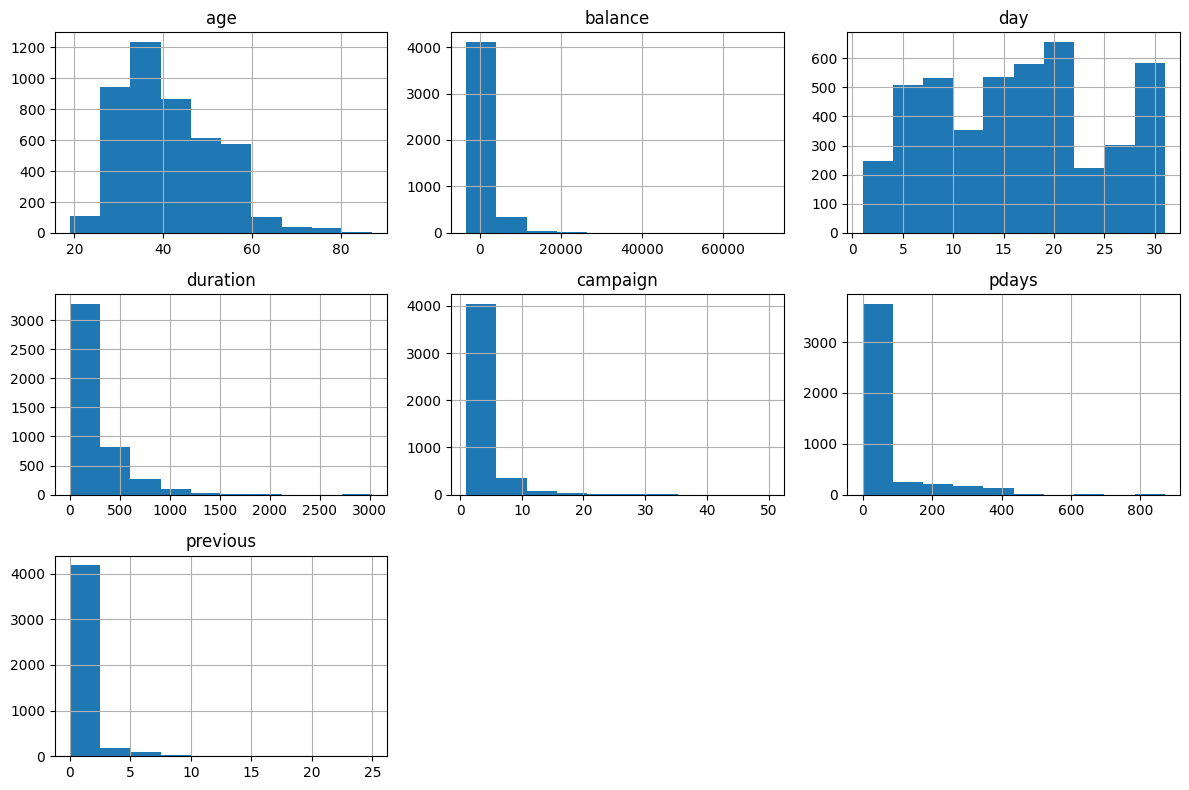

In [ ]:
data.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

**Feature Statistical Analysis Based on the Summary and The Histogram**

- **Age**: The youngest individual is 19 years old, while the oldest is 87. The average age of individuals contacted is approximately 41 years old, with a standard deviation of 10.58 years old.
The age distribution is predominantly between the mid-20s and 50s, indicating that the campaign mainly targets individuals in their working-age years.

- **Balance**: The lowest balance observed is \$-3,313, which indicates those individuals in debt, and the highest balance is \$7,1188. The average account balance is around \$1422.66, with a standard deviation of \$3009.64. This reflects on the average yearly balance distribution on where only few clients have average yearly balance above \$10,000

- **Day**: The minimum day is the 1st, and the maximum is the 31st. The contacts were made mostly evenly throughout the month, with an average day of contact being around the 15th.
The day distribution also shows the peak of the day contact was made was on between the 20th.

- **Duration**: The shortest duration is 4 seconds, while the longest is 3025 seconds. The average duration of the last contact is approximately 263.96 seconds, with a standard deviation of 259.86.

- **Campaign**: On average, each individual was contacted about 2.79 times during this campaign, with a maximum of 50 contacts.

- **Pdays**: The minimum value is -1, which indicates individuals not previously contacted, and the maximum is 871. The average number of days since the individual was last contacted from a previous campaign is approximately 39.77 days.

- **Previous**: The average number of contacts performed before this campaign for each individual is approximately 0.54, with a maximum of 25 contacts.

## Features Correlation

<ipython-input-7-3aace378e7ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap='coolwarm')


<Axes: >

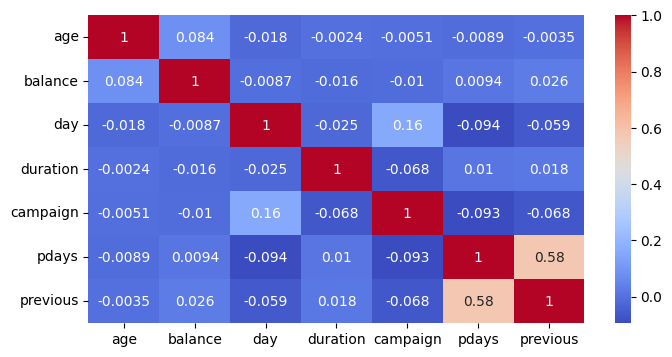

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

The heatmap shows that `previous` has a strong correlation with the pdays and
the outcome of clients subscribing (y) has strong positive correlation with the pday, which is the number of days since the individual was last contacted from a previous campaign. This suggests that more recent interactions with clients may have a positive impact on their likelihood of subscribing to the term deposit.

# **Process Data**

## Pre-process data by looking at unique values of each features

In [ ]:
for col in data.columns:
    if data[col].dtype == 'object' and data[col].str.contains("unknown").any():
        print(col, data[col].unique())

job ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
education ['primary' 'secondary' 'tertiary' 'unknown']
contact ['cellular' 'unknown' 'telephone']
poutcome ['unknown' 'failure' 'other' 'success']


**Result**
The categorical features contain "unknown" entries are job, education, contact, poutcome.

Therefore, we need to handle those unknown entries by replacing unknown entries with the most prevalent entries.

## Handle unknown entries on Job feature

In [ ]:
# Check the frequency of each job category
job_counts = data['job'].value_counts()

# Find the most frequent job category
most_frequent_job = job_counts.idxmax()

# Replace 'unknown' entries with the most frequent job category
data['job'].replace('unknown', most_frequent_job, inplace=True)
data['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired'], dtype=object)

## Handle unknown entries on education feature

In [ ]:
# Check the frequency of each education category
education_counts = data['education'].value_counts()

# Find the most frequent education category
most_frequent_education = education_counts.idxmax()

# Replace 'unknown' entries with the most frequent education category
data['education'].replace('unknown', most_frequent_education, inplace=True)
data['education'].unique()

array(['primary', 'secondary', 'tertiary'], dtype=object)

## Handle unknown entries on contact feature

In [ ]:
# Check the frequency of each contact category
contact_counts = data['contact'].value_counts()

# Find the most frequent contact category
most_frequent_contact = contact_counts.idxmax()

# Replace 'unknown' entries with the most frequent contact category
data['contact'].replace('unknown', most_frequent_contact, inplace=True)
data['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

## Handle unknown entries on poutcome feature

In [ ]:
# Check the frequency of each poutcome category
poutcome_counts = data['poutcome'].value_counts()
print(poutcome_counts)

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


Since the number of unknown entries are way too much, we would distribute those unknown entries to failure, other, and sucess evenly

In [ ]:
unknown_rows = data[data['poutcome'] == 'unknown']

# Divide the length of the 'unknown' rows into 3 to distribute to the other 3 categories
additional_vals = int(len(unknown_rows) / 3)

# Find the indices of 'unknown' entries in the 'poutcome' column
unknown_indices = data.index[data['poutcome'] == 'unknown']

# Randomly select from 'unknown_indices'
replacement_indices = np.random.choice(unknown_indices, size=additional_vals, replace=False)

# Replace the selected 'unknown' entries with 'failure'
data.loc[replacement_indices, 'poutcome'] = 'failure'


# Find the indices of 'unknown' entries in the 'poutcome' column
unknown_indices_1 = data.index[data['poutcome'] == 'unknown']

# Randomly select from 'unknown_indices_1'
replacement_indices_other = np.random.choice(unknown_indices_1, size=additional_vals, replace=False)

# Replace the selected 'unknown' entries with 'other'
data.loc[replacement_indices_other, 'poutcome'] = 'other'

# Find the indices of 'unknown' entries in the 'poutcome' column
unknown_indices_2 = data.index[data['poutcome'] == 'unknown']

# Randomly select from 'unknown_indices_2'
replacement_indices_success = np.random.choice(unknown_indices_2, size=additional_vals, replace=False)

# Replace the selected 'unknown' entries with 'success'
data.loc[replacement_indices_success, 'poutcome'] = 'success'

# Verify the distribution of values in the 'poutcome' column
print(data['poutcome'].value_counts())

failure    1725
other      1432
success    1364
Name: poutcome, dtype: int64


## Apply Transformation

To convert categorical variables including 'job', 'marital', 'contact', and 'poutcome' to numerical values, we employ one-hot encoding. One-hot encoding is utilized when dealing with nominal categorical variables, where each unique category is transformed into a binary vector indicating its presence or absence.

In this transformation process:
- Each categorical variable is expanded into multiple binary variables, with one variable for each unique category within that variable.
- For each observation, the binary variable corresponding to its category is set to 1, while all others are set to 0.
- Drop_first is being set to True, one less column will be created for each categorical variable compared to the number of unique categories in that variable. Thus, the model can be inferred from the absence of all other categories being set to 0.

The resulting dataset, after applying one-hot encoding, will contain additional columns, where each column represents a unique category from the original categorical variables. These new columns will consist of binary values indicating the presence or absence of each category for each observation.



In [ ]:
categorical_vars = ['job', 'marital', 'contact', 'poutcome']

categorical_encoding = pd.get_dummies(data[categorical_vars], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
data_encoded = pd.concat([data, categorical_encoding], axis=1)

# Drop the original categorical variables
data_encoded.drop(categorical_vars, axis=1, inplace=True)

# Display the encoded DataFrame
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   education          4521 non-null   object
 2   default            4521 non-null   object
 3   balance            4521 non-null   int64 
 4   housing            4521 non-null   object
 5   loan               4521 non-null   object
 6   day                4521 non-null   int64 
 7   month              4521 non-null   object
 8   duration           4521 non-null   int64 
 9   campaign           4521 non-null   int64 
 10  pdays              4521 non-null   int64 
 11  previous           4521 non-null   int64 
 12  y                  4521 non-null   object
 13  job_blue-collar    4521 non-null   uint8 
 14  job_entrepreneur   4521 non-null   uint8 
 15  job_housemaid      4521 non-null   uint8 
 16  job_management     4521 non-null   uint8 


Convert those unit8 types to int64 types

In [ ]:
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'uint8':
        data_encoded[column] = data_encoded[column].astype('int64')

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   education          4521 non-null   object
 2   default            4521 non-null   object
 3   balance            4521 non-null   int64 
 4   housing            4521 non-null   object
 5   loan               4521 non-null   object
 6   day                4521 non-null   int64 
 7   month              4521 non-null   object
 8   duration           4521 non-null   int64 
 9   campaign           4521 non-null   int64 
 10  pdays              4521 non-null   int64 
 11  previous           4521 non-null   int64 
 12  y                  4521 non-null   object
 13  job_blue-collar    4521 non-null   int64 
 14  job_entrepreneur   4521 non-null   int64 
 15  job_housemaid      4521 non-null   int64 
 16  job_management     4521 non-null   int64 


To convert categorical variables 'education', 'housing', 'loan', and 'default' to numerical values using Label Encoding, we employ a technique called Label Encoding. Label Encoding is utilized when dealing with ordinal categorical variables, where the categories have a natural order or hierarchy.

1. **Create LabelEncoder**: We initialize a LabelEncoder object, which will be name, `encoder`, used to transform the categorical variables into numerical labels.

2. **Fit and Transform**: Using the `fit_transform()` method, we apply the LabelEncoder to each categorical variable separately, such as 'education', 'housing', 'loan', 'default'. This operation assigns a unique numerical value to each category present in the variable.

3. **Replace Original Columns**: After encoding, we replace the original categorical columns in the DataFrame with the new numerical labels. This step involves dropping the original columns and replacing them with the newly created numerical labels.

In [ ]:
encoder = LabelEncoder()

education_encoded = encoder.fit_transform(data_encoded['education'])

education_var = pd.Series(education_encoded, name = 'education')

data_encoded = pd.concat([data_encoded.drop(columns=['education']), education_var], axis = 1)

data_encoded.head(5)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success,education
0,30,no,1787,no,no,19,oct,79,1,-1,...,0,0,0,1,1,0,0,0,0,0
1,33,no,4789,yes,yes,11,may,220,1,339,...,1,0,0,0,1,0,0,0,0,1
2,35,no,1350,yes,no,16,apr,185,1,330,...,0,0,0,0,0,1,0,0,0,2
3,30,no,1476,yes,yes,3,jun,199,4,-1,...,0,0,0,0,1,0,0,0,0,2
4,59,no,0,yes,no,5,may,226,1,-1,...,0,0,0,0,1,0,0,0,0,1


Apply label encoding to default feature

In [ ]:
default_encoded = encoder.fit_transform(data_encoded['default'])

default_var = pd.Series(default_encoded, name ='default')

data_encoded = pd.concat([data_encoded.drop(columns=['default']), default_var], axis = 1)

data_encoded.head(5)

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success,education,default
0,30,1787,no,no,19,oct,79,1,-1,0,...,0,0,1,1,0,0,0,0,0,0
1,33,4789,yes,yes,11,may,220,1,339,4,...,0,0,0,1,0,0,0,0,1,0
2,35,1350,yes,no,16,apr,185,1,330,1,...,0,0,0,0,1,0,0,0,2,0
3,30,1476,yes,yes,3,jun,199,4,-1,0,...,0,0,0,1,0,0,0,0,2,0
4,59,0,yes,no,5,may,226,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


Apply label encoding to 'housing' feature

In [ ]:
housing_encoded = encoder.fit_transform(data_encoded['housing'])

housing_var = pd.Series(housing_encoded, name ='housing')

data_encoded = pd.concat([data_encoded.drop(columns=['housing']), housing_var], axis = 1)

data_encoded.head(5)

,age,balance,loan,day,month,duration,campaign,pdays,previous,y,...,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success,education,default,housing
0,30,1787,no,19,oct,79,1,-1,0,no,...,0,1,1,0,0,0,0,0,0,0
1,33,4789,yes,11,may,220,1,339,4,no,...,0,0,1,0,0,0,0,1,0,1
2,35,1350,no,16,apr,185,1,330,1,no,...,0,0,0,1,0,0,0,2,0,1
3,30,1476,yes,3,jun,199,4,-1,0,no,...,0,0,1,0,0,0,0,2,0,1
4,59,0,no,5,may,226,1,-1,0,no,...,0,0,1,0,0,0,0,1,0,1


Apply label encoding to 'loan' feature

In [ ]:
loan_encoded = encoder.fit_transform(data_encoded['loan'])

loan_var = pd.Series(loan_encoded, name ='loan')

data_encoded = pd.concat([data_encoded.drop(columns=['loan']), loan_var], axis = 1)

data_encoded.head(5)

,age,balance,day,month,duration,campaign,pdays,previous,y,job_blue-collar,...,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success,education,default,housing,loan
0,30,1787,19,oct,79,1,-1,0,no,0,...,1,1,0,0,0,0,0,0,0,0
1,33,4789,11,may,220,1,339,4,no,0,...,0,1,0,0,0,0,1,0,1,1
2,35,1350,16,apr,185,1,330,1,no,0,...,0,0,1,0,0,0,2,0,1,0
3,30,1476,3,jun,199,4,-1,0,no,0,...,0,1,0,0,0,0,2,0,1,1
4,59,0,5,may,226,1,-1,0,no,1,...,0,1,0,0,0,0,1,0,1,0


To convert the categorical variable representing months into numerical values, we can map each month name to its corresponding numeric value.
This mapping can be achieved using a dictionary where the keys are the month names and the values are the corresponding numeric values.

In [ ]:
month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data_encoded['month_numeric'] = data_encoded['month'].map(month_dict)
data_encoded = data_encoded.drop(columns='month')

## **Process Target Variable 'y' for Machine Learning**

To process the target variable 'y' for machine learning classification tasks, we need to convert the boolean desired target variable into a binary numeric target variable, where '0' represents 'no' and '1' represents 'yes'.

Afterward, we can drop the original 'y' data field from the original DataFrame.

In [ ]:
y_var = encoder.fit_transform(data_encoded[['y']])

y_var = pd.Series(y_var, name = 'y')

data_encoded = pd.concat([data_encoded.drop(columns=['y']), y_var], axis = 1)

data_encoded.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,marital_single,contact_telephone,poutcome_other,poutcome_success,education,default,housing,loan,month_numeric,y
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,0,1,0,1,1,5,0
2,35,1350,16,185,1,330,1,0,0,0,...,1,0,0,0,2,0,1,0,4,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,0,0,0,2,0,1,1,6,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,0,1,0,1,0,5,0


## Understanding the target variable 'y'


To gain a better understanding of the outcome variable 'y' based on the dataset, we can visualize the distribution of its values using a count plot. Additionally, we can use value_counts() and print the number of clients who subscribed ('yes') and the number of clients who did not subscribe ('no').

0    4000
1     521
Name: y, dtype: int64
The number of clients subscribed is 521 and the number of not subscribing 4000


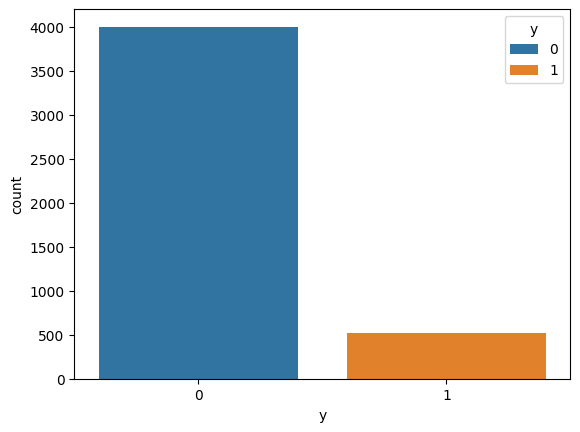

In [ ]:
sns.countplot(x='y', data=data_encoded, hue='y')

outcome_y = data_encoded['y'].value_counts()
print(outcome_y)
print(f'The number of clients subscribed is {outcome_y[1]} and the number of not subscribing {outcome_y[0]}')

**Result**

The proportion of clients who subscribed to the term deposit is slightly over 10%, with 521 out of 4521 clients subscribing and 4000 clients not subscribing.

This dataset imbalance datasets where 'not subscribing' class heavily outweights the 'subscribing' class could lead to challenges in accurately predicting the minority class. Specifically, in the precision and recall scores for the predictions.


The precision score measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Thus, precision tells how many positive predictions are actually correct.
In this case, because there are many more instances of 'not subscribing' (4000) compared to 'subscribing' (521), the model might predict 'not subscribing' for most instances, resulting in a high number of true negatives but also a high number of false negatives. This could lead to a low precision score for the minority class ('subscribing').


Similarly, the recall score measures the proportion of correctly predicted positive instances out of all actual positive instances. In an imbalanced dataset, the model might not correctly capture all instances of the minority class ('subscribing'), resulting in a low recall score for that class.

# **Perform Machine Learning**

Prior to implementing machine learning techniques, perform additional data preprocessing. Begin by isolating the classification target, denoted by the variable 'y', from the dataset. Then, partition the dataset into training and testing sets using the train_test_split method.

In [ ]:
target_data = data_encoded['y'].values

print(target_data.shape)

data_encoded = data_encoded.drop(columns= ['y'])

data_encoded.info()

(4521,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   balance            4521 non-null   int64
 2   day                4521 non-null   int64
 3   duration           4521 non-null   int64
 4   campaign           4521 non-null   int64
 5   pdays              4521 non-null   int64
 6   previous           4521 non-null   int64
 7   job_blue-collar    4521 non-null   int64
 8   job_entrepreneur   4521 non-null   int64
 9   job_housemaid      4521 non-null   int64
 10  job_management     4521 non-null   int64
 11  job_retired        4521 non-null   int64
 12  job_self-employed  4521 non-null   int64
 13  job_services       4521 non-null   int64
 14  job_student        4521 non-null   int64
 15  job_technician     4521 non-null   int64
 16  job_unemployed     4521 non-null   int64
 17  marita

Create training data by dividing dataframe into training and testing set, with training set consisting of 60% of the total dataframe.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_data, train_size = 0.6, random_state = 42, stratify=target_data)

Output the resulting shapes of the training and testing samples to confirm that the split was successful.

In [ ]:
print('=== Training Shape ===')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)

print('=== Testing Shape ===')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)


=== Training Shape ===
X train shape:  (2712, 27)
Y train shape:  (2712,)
=== Testing Shape ===
X test shape:  (1809, 27)
Y test shape:  (1809,)


##**Perform a K-Nearest Neighbor algorithm**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_y_prediction = knn.predict(X_test)

print('====== K-nearest Neighbors ======')
print(metrics.classification_report(y_test, knn_y_prediction, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, knn_y_prediction, output_dict = True)['accuracy'])

====== K-nearest Neighbors ======
{'precision': 0.8429000606829025, 'recall': 0.8767274737423991, 'f1-score': 0.8525671755083526, 'support': 1809}
accuracy:  0.8767274737423991


**Result**

KNN performance scores are relatively high, specifically,
- Precision stands at 84%.
- Recall achieves 88%.
- Accuracy mirrors 88%.
- The F1-score reaches 85%.

These metrics collectively indicate that the KNN algorithm performs reasonably well on this dataset.

**Advantages**
- Simple and straightforward implementation
- Well-suited for binary classification tasks, where it distinguishes one class from others based on proximity to neighboring data points.

**Disadvantages**
- Might need to perform k-neighbors selection in order to obtain the optimal k neighbors value

Overall, KNN makes predictions based on the majority class among the k-nearest neighbors of a given data point, which can help mitigate biases in regions of high-density data.

However, KNN may be sensitive to biases related to the choice of distance metric and the value of k, which can affect the classification boundaries and lead to biased predictions.

##Perform a list of K-Nearest Neighbor to select the optimal K##

In [ ]:
n_neighbors = [1, 2, 3, 5, 7, 9, 10, 20, 50]

acc_score = list()

for n in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = n)

  knn.fit(X_train, y_train)

  knn_y_predict = knn.predict(X_test)

  acc_score.append(metrics.accuracy_score(y_test, knn_y_predict))

for i, n in enumerate(n_neighbors):
  print(f'KNN n = {n} with accuracy score {acc_score[i]}')


KNN n = 1 with accuracy score 0.841901603095633
KNN n = 2 with accuracy score 0.8717523493642897
KNN n = 3 with accuracy score 0.8700939745715865
KNN n = 5 with accuracy score 0.8767274737423991
KNN n = 7 with accuracy score 0.8811498065229408
KNN n = 9 with accuracy score 0.882808181315644
KNN n = 10 with accuracy score 0.8839137645107794
KNN n = 20 with accuracy score 0.8888888888888888
KNN n = 50 with accuracy score 0.8855721393034826


In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=20)

knn_optimal.fit(X_train, y_train)

knn_y_prediction = knn_optimal.predict(X_test)

print('====== K-nearest Neighbors with Optimal Parameter ======')
print(metrics.classification_report(y_test, knn_y_prediction, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, knn_y_prediction, output_dict = True)['accuracy'])

====== K-nearest Neighbors with Optimal Parameter ======
{'precision': 0.8625555971234984, 'recall': 0.8888888888888888, 'f1-score': 0.8490716690111663, 'support': 1809}
accuracy:  0.8888888888888888


**Conclusion**

With the optimal number of neighbors set to n = 20, the performance scores of the KNN algorithm exhibit improvements:
- Precision shows a slight increase to 86%.
- Recall increases to 89%.
- Accuracy improves to 89%.
- The F1-score remains stable at 85%.

**Difference In Results**

Upon identifying the optimal number of neighbors, marginal enhancements in performance scores are observed. This suggests that while the choice of neighbors is important, other factors such as irrelevant features and data noise may also influence the algorithm's performance.

##**Perform Logistic Regression algorithm**

In [ ]:
# Logistic Regression
logistic = LogisticRegression(max_iter= 5000)

logistic.fit(X_train, y_train)

lg_y_predict = logistic.predict(X_test)

print('====== Logistic Regression ======')
print(metrics.classification_report(y_test, lg_y_predict, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, lg_y_predict, output_dict = True)['accuracy'])

====== Logistic Regression ======
{'precision': 0.8665451736052115, 'recall': 0.8911000552791598, 'f1-score': 0.8671436166886397, 'support': 1809}
accuracy:  0.8911000552791598


**Result**

The Logistic Regression algorithm shows a strong performance with relatively high scores:

- Precision: 87%
- Recall: 89%
- Accuracy: 89%
- F1-score: 87%

These metrics collectively suggest that Logistic Regression performs great on this dataset compared to KNN.

**Advantages**

- Simple and interpretable model.
- Efficient for binary classification tasks.

**Disadvantages**

- Assumes linear relationship between features and target variable.
- Sensitive to outliers.
- May require feature scaling for optimal performance.

**Difference In Results**

The performance of Logistic Regression shows notable improvement over KNN, particularly in terms of precision and F1-score. This indicates that Logistic Regression might be better suited for this dataset due to its strong performance across multiple metrics.

Overall, Logistic Regression can handle biases effectively when the decision boundary is linear or when the relationship between features and the target variable is well-behaved.
Logistic Regression models are interpretable which mitigate biases by examining the coefficients associated with each feature.


## Confusion Matrix for performance

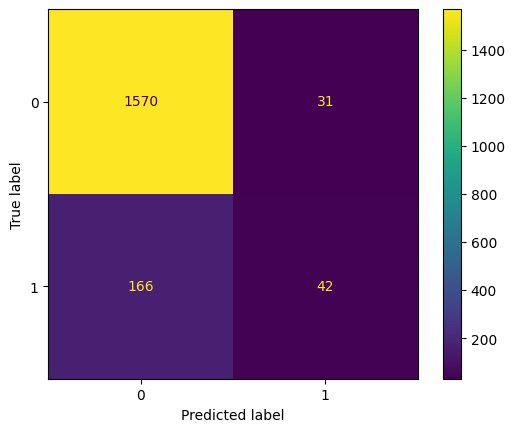

In [ ]:
cf_matrix = confusion_matrix(y_test, lg_y_predict, labels = logistic.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = logistic.classes_)
disp.plot()

**Result Discussion**

The confusion matrix table shows that the Logistic Regression model correctly predicted 1571 instances as true negatives and 38 instances as true positives.
However, it also misclassified 30 instances as false positives and 170 instances as false negatives.

This distribution indicates an imbalance of each class, particularly a notable disparity between the number of negative and positive predictions.

Furthermore, the model tends to make more accurate negative predictions than positive ones, which clearly an indication of a potential bias towards classifying instances as negative.

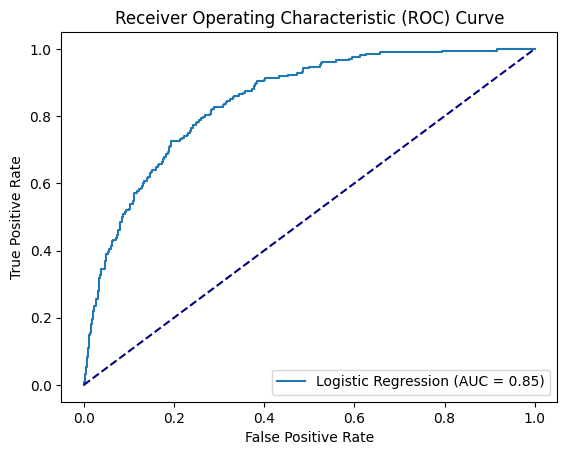

In [ ]:
y_predict_prob = logistic.predict_proba(X_test)[:, 1]
FP_rate, TP_rate, thresholds = metrics.roc_curve(y_test, y_predict_prob)

auc_curve = metrics.auc(FP_rate, TP_rate)

display_roc = metrics.RocCurveDisplay(fpr=FP_rate, tpr= TP_rate, roc_auc=auc_curve, estimator_name='Logistic Regression')
display_roc.plot()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Add diagonal line
plt.legend(loc='lower right')
plt.show()

**Result Discussion**

With an Area under the ROC curve (AUC) of 83%, the Logistic Regression model demonstrates a moderate performance in balancing sensitivity and specificity metrics of the model.

##**Perform Naive Baye algorithm**

In [ ]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

nb_y_prediction = naive_model.predict(X_test)

print('====== Naive Baye Algorithm ======')
print(metrics.classification_report(y_test, nb_y_prediction, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, nb_y_prediction, output_dict = True)['accuracy'])

====== Naive Baye Algorithm ======
{'precision': 0.856503121349953, 'recall': 0.8286346047540077, 'f1-score': 0.8407209764022876, 'support': 1809}
accuracy:  0.8286346047540077


**Result**

The Naive Bayes classifier exhibits relatively lower performance scores compared to KNN and Logistic Regression, notably:

- Precision: 85%
- Recall: 83%
- Accuracy: 83%
- F1-score: 84%

Although Naive Bayes performs reasonably well on this dataset, achieving lower scores compared to Logistic Regression and KNN suggests that further optimizations may be necessary, such as utilizing cross-validation techniques.

**Advantages**

- Simple and computationally efficient.
- Performs well with small datasets.

**Disadvantages**

- Assumes independence between features.
- Sensitive to outliers.
- May not capture complex relationships between features.

**Difference In Results**

The lower performance scores of Naive Bayes, particularly in precision and recall, indicate that it may struggle with certain aspects of the dataset compared to Logistic Regression and KNN.

Overall, Naïve Bayes assumes that features are conditionally independent given the class label, which can mitigate biases caused by feature dependencies.
However, Naïve Bayes may struggle with biases present in the dataset, especially if the independence assumption is violated or if there are strong correlations between features.


##**Perform Decision Tree algorithm**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_prediction = dt_model.predict(X_test)

print('====== Decision Tree Classifier Algorithm ======')
print(metrics.classification_report(y_test, dt_prediction, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, dt_prediction, output_dict = True)['accuracy'])

====== Decision Tree Classifier Algorithm ======
{'precision': 0.8560120230921335, 'recall': 0.8529574350469873, 'f1-score': 0.8544529569159938, 'support': 1809}
accuracy:  0.8529574350469873


**Result**

Comparing the performance of the Decision Tree classifier to that of KNN, Logistic Regression, and the Naive Bayes algorithm, the Decision Tree performs slightly below KNN and Logistic Regression. Specifically, the Decision Tree classifier achieves the following performance metrics:

- Precision: 85%
- Recall: 85%
- Accuracy: 85%
- F1-score: 85%

Even though Decision Tree Classifier scores are lower than those of KNN and Logistic Regression, it shows a consistent performance across multiple metrics, indicating the effectiveness of the Decision Tree algorithm on this dataset.

**Advantages**

- Ability to handle both numerical and categorical data.
- Quick and easy to find the most outperform features (which is using feature_importance attribute) in a set of features.

**Disadvantages**

- Sensitive to small variations in the data.
- May create biased trees if certain classes dominate the dataset.
- Require intensive tree computation and the model is hard to interpretable compared to a single decision tree.

Overall, Decision Trees can capture nonlinear relationships between features and the target variable which make them robust to certain types of biases.

However, Decision Trees may suffer from biases related to feature selection and may overfit the training data if not pruned properly.

##Use Grid Search Cross Validation to find optimal hyper parameter

In [ ]:
# create dict for param grid
param_grid = {'max_depth': [i for i in range(1, 20) if i % 4 == 0], 'max_leaf_nodes': [i for i in range(1, 20) if i % 4 == 0]}

# Find optimal hyper parameter
grid_search = GridSearchCV(dt_model, param_grid, cv= 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

# Get the best param
optimal_param = grid_search.best_params_

print('Optimal Params: ', optimal_param)

dt_prediction_optimal = grid_search.predict(X_test)
print('====== Decision Tree Classifier Algorithm With Hyper Parameter ======')
print(metrics.classification_report(y_test, dt_prediction_optimal, output_dict = True)['weighted avg'])
print('accuracy: ', metrics.classification_report(y_test, dt_prediction_optimal, output_dict = True)['accuracy'])

Optimal Params:  {'max_depth': 4, 'max_leaf_nodes': 16}
====== Decision Tree Classifier Algorithm With Hyper Parameter ======
{'precision': 0.883607264618248, 'recall': 0.8988391376451078, 'f1-score': 0.8868017091745811, 'support': 1809}
accuracy:  0.8988391376451078


**Result**

After refinement of the Decision Tree classifier, it appears to outperform KNN, Logistic Regression, and the Naive Bayes algorithm. With the optimized parameters, the Decision Tree classifier achieved the following metrics:

- Precision: 88%
- Recall: 90%
- Accuracy: 90%
- F1-score: 89%

These results suggest that, with the right settings, the Decision Tree Classifier can perform better in the dataset.
However, it's still noteworthy that Logistic Regression continues to demonstrate strong performance even without extensive parameter tuning.

## Perform Feature Importance

Text(0, 0.5, 'Feature')

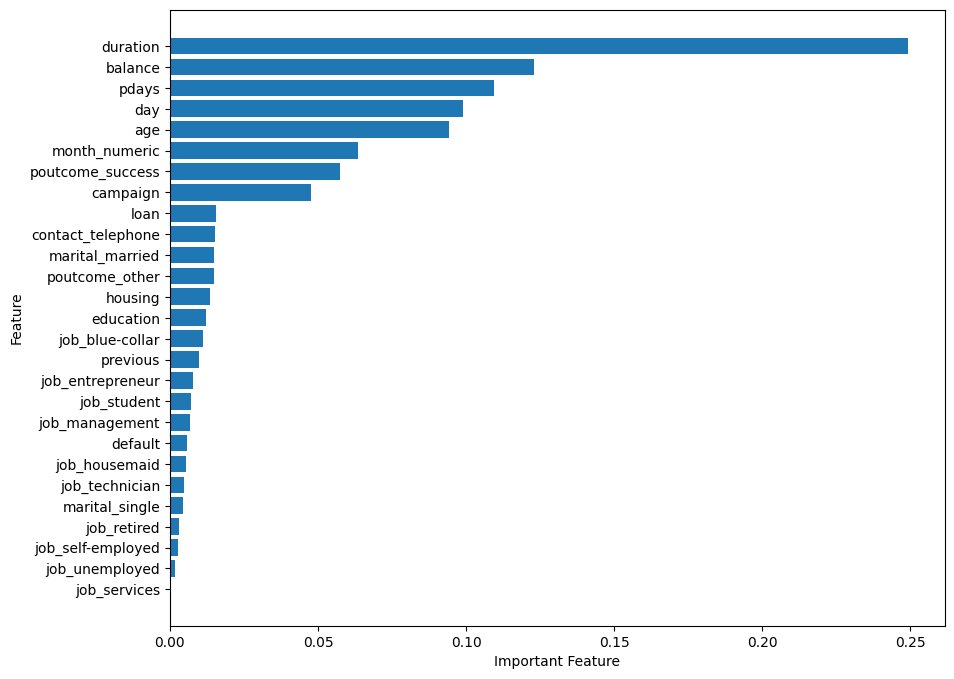

In [ ]:
# Extract feature importances
feature_importances = dt_model.feature_importances_

# Get feature importances with their corresponding feature names
feature_names = X_train.columns

# Make a bar chart
plt.figure(figsize= (10, 8))
plt.barh(range(len(feature_importances)), feature_importances[np.argsort(feature_importances)])
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in np.argsort(feature_importances)])
plt.xlabel('Important Feature')
plt.ylabel('Feature')

**Result Discussion**

The plot shows that the "duration" feature significantly influences the model predictions. This suggests that longer call durations are more likely to lead to customer subscribed to the term deposit, indicating the importance of this feature in predicting subscription outcomes.

# **Models Performance Comparison**

\begin{array}{ccc}
\text{}& \textbf{Model}&\textbf{Accuracy}&\textbf{Precision}&\textbf{Recall}&\textbf{F1-score}\\
1 & Knn & 88\% & 84\% & 88\% & 85\% \\
2 & Knn-Optimal & 89\% & 86\% & 89\% & 85\% \\
3 & Logistic Regression & 89\% & 87\% & 89\% & 87\% \\
4 & Naive Bayes & 83\% & 85\% & 83\% & 84\% \\
5 & Decision Tree & 85\% & 85\% & 85\% & 85\% \\
6 & Decision Tree Optimal & 90\% & 88\% & 90\% & 89\% \\
\end{array}

**Discussion**

The Decision Tree Algorithm with optimal parameters achieves the highest scores in accuracy predictions, precision, recall, and f1-score measurements compared to all other models. This highlights the importance of conducting grid search to identify optimal parameters, particularly for datasets with numerous categorical features.

Conversely, the Naive Bayes algorithm obtains the lowest performance with only 83% accuracy, 85% precision, 83% recall, and 84% f1-score. This suggests that the Naive Bayes algorithm might not be suitable for this binary classification task due to its assumption of independence between features, which may not hold true in a dataset where the target variable strongly correlates with other features, such as the duration of calls.

Among the six models considered, Logistic Regression demonstrates the highest performance prediction scores in accuracy, precision, recall, and f1-score without the need for cross-validation. This indicates that Logistic Regression is well-suited for binary classification tasks due to its robustness and efficiency in handling this dataset. However, the confusion matrix shows that the model tends to make more accurate negative predictions than positive ones, which is clearly an indication of a potential bias towards classifying instances as negative.

Despite achieving accuracy scores greater than 85%, it is crucial to acknowledge potential biases within the dataset, particularly concerning the handling of categorical features.

Comparing our Naive Bayes, Logistic Regression, and Decision Tree models to the results in the research article "A data modeling approach for classification problem," we observe higher accuracy scores across various models, particularly Naive Bayes with 96.63%, Logistic Regression with 98.61%, and Decision Tree with 100%, which are roughly 5% higher than our prediction scores. This disparity may be attributed to the inclusion of four additional features such as `Emp.var.rate`, `Cos.price.idx`, `Cons.conf.idx`, and `Euribor3m`, which significantly impact the effectiveness of categorical features in the dataset.

Furthermore, the thorough preprocessing of categorical features, particularly `job`, `marital`, and `education` features, in the research article contributes to mitigating biases in the dataset. For instance, handling 'unknown' entries by comparing proportions and assigning dominant classes helps eliminate biases in the dataset.

Particularly for the `job` and `marital` features, the research article outlines the steps of handling the 'unknown' entries:
- First, count the total number of each class, `yes` or `no`, of the target variable `y`.
- Second, count the number of `married`, `single`, or `divorced` entries for each separate class and divide by the total number of entries representing those classes in the `no` or `yes` class, respectively.
- Finally, compare these proportions to determine which one is greater, assigning `1` to the dominant class and `0` to the others. This careful preprocessing of categorical features aims to eliminate biases in the dataset.

In contrast, our approach, which involves a majority voting logic for handling 'unknown' entries, may introduce biases if one class dominates the feature, disproportionately affecting minority classes.

Regarding the `education` feature, researchers convert educational categories into a numeric ordering. Then, they compute the average for neighboring categories and assign the associated numeric value to 'unknown' entries. This strategy can help maintain the hierarchical order of the `education` feature.

In conclusion, carefully preprocessing data, particularly employing similar techniques to those outlined in the research article, is essential for datasets with numerous categorical features and 'unknown' entries to achieve optimal accuracy scores. This underscores the significance of considering biases, interpretability, and ethics when applying algorithms to datasets to ensure robustness and unbiasedness in the analysis. By prioritizing thorough data preprocessing and adopting ethical considerations, we can enhance the reliability and validity of our findings, contributing to more informed decision-making processes.